In [1]:
!nvidia-smi -L

DNS server not authoritative for zone.


In [2]:
!pip install tensorflow==2.15.0

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.models import model_from_json
import numpy as np
import shutil


import os # inbuilt module
import random # inbuilt module
import webbrowser # inbuilt module

In [4]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
print( 'Tensorflow Version:', tf.__version__)
print("GPU Available::", tf.config.list_physical_devices('GPU'))


Tensorflow Version: 2.15.0
GPU Available:: []


In [5]:
import PIL
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import model_from_json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p
from tensorflow.keras import layers
to_categorical = tf.keras.utils.to_categorical

In [6]:
import pathlib
data_set_dir = "train/PortraitPhotography"
data_dir = pathlib.Path(data_set_dir)   
image_count = len(list(data_dir.glob('*/*.jpg')))  
print("count of image which .jpg : ",image_count)

count of image which .jpg :  1435


In [7]:
batch_size = 10 
img_height = 800
img_width = 800

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  #sแบ่งข้อมูล เพื่อ training 80% และ validate 20%
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1439 files belonging to 3 classes.
Using 1152 files for training.
Found 1439 files belonging to 3 classes.
Using 287 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Bad', 'Excellent', 'Good']


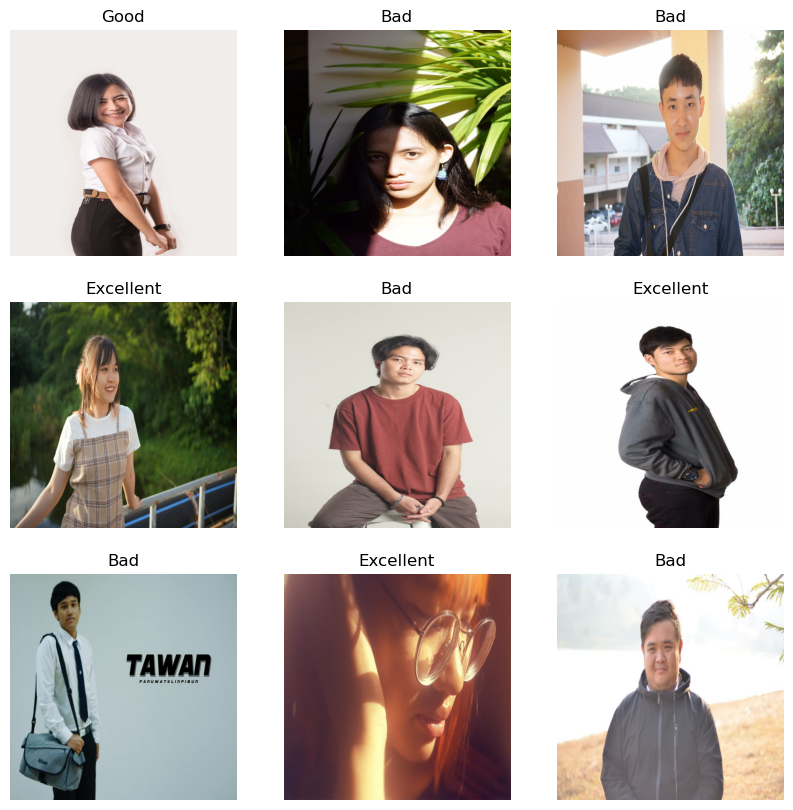

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) 
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [12]:
num_classes = 3
epochs= 15
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 800, 800, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 800, 800, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 400, 400, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 400, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 200, 200, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 64)      

In [ ]:
start = time.time()
his = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15

116/116 [==============================] - 132s 1s/step - loss: 2.5938 - accuracy: 0.5469 - val_loss: 0.9999 - val_accuracy: 0.5958
Epoch 2/15
 35/116 [========>.....................] - ETA: 1:21 - loss: 0.9744 - accuracy: 0.5857

In [20]:
with open('history_model', 'wb') as file:
    p.dump(his.history, file)
    
filepath='model.h5'
model.save(filepath)
filepath_model = 'model.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
    json_file.write(model_json)
    
    model.save_weights('weights_model.h5')
    print("Saved model to disk")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk
